In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', header=None)
df = df.drop(df.columns[9], axis=1)


['2mm', '3mm', 'adi', 'atax', 'bicg', 'cholesky', 'correlation', 'covariance', 'deriche', 'doitgen', 'durbin', 'fdtd-2d', 'floyd-warshall', 'gemm', 'gemver', 'gesummv', 'gramschmidt', 'heat-3d', 'jacobi-1d', 'jacobi-2d', 'lu', 'ludcmp', 'mvt', 'nussinov', 'seidel-2d', 'symm', 'syr2k', 'syrk', 'trisolv', 'trmm']


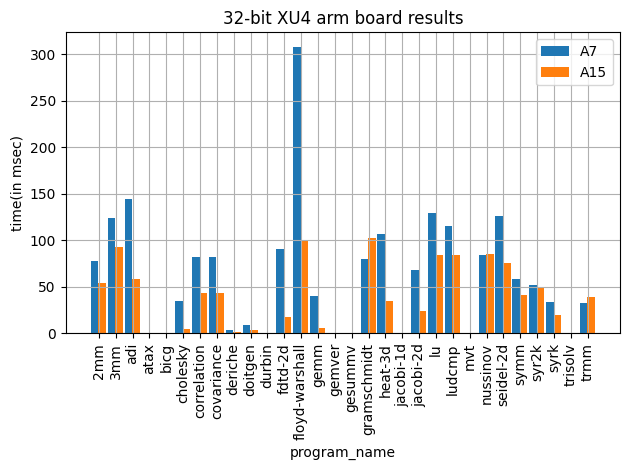

In [3]:
Y1 = []
Y2 = []

for i in range(30):
    num1 = np.array(df.iloc[i, 1:5])
    num2 = np.array(df.iloc[i, 5:])
    Y1.append(num1.mean())
    Y2.append(num2.mean())

X_ = np.array(df.iloc[:, 0])
X=[]
for x in X_:
    X.append(x[:-5])
print(X)
barWidth = 0.5
x = np.arange(len(X))
#fig = plt.figure(figsize=(8, 6))
plt.bar(x, Y1, width=barWidth-0.05, label='A7')
plt.bar(x+barWidth-0.05, Y2, width=barWidth-0.05, label='A15')
plt.xticks(x+barWidth/2, X,rotation=90)
plt.xlabel('program_name')
plt.ylabel('time(in msec)')
plt.title('32-bit XU4 arm board results')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('32-bit.png')
plt.show()

In [4]:
df = pd.read_csv('data2.csv', header=None)

['2mm', '3mm', 'adi', 'atax', 'bicg', 'cholesky', 'correlation', 'covariance', 'deriche', 'doitgen', 'durbin', 'fdtd-2d', 'floyd-warshall', 'gemm', 'gemver', 'gesummv', 'gramschmidt', 'heat-3d', 'jacobi-1d', 'jacobi-2d', 'lu', 'ludcmp', 'mvt', 'nussinov', 'seidel-2d', 'symm', 'syr2k', 'syrk', 'trisolv', 'trmm']


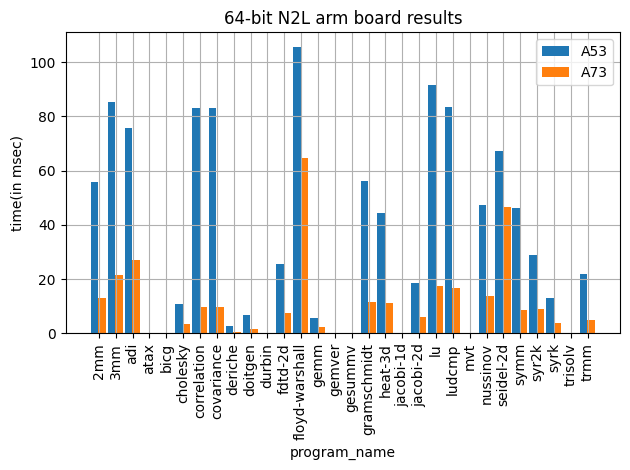

In [5]:
Y1 = []
Y2 = []

for i in range(30):
    num1 = np.array(df.iloc[i, 1:3])
    num2 = np.array(df.iloc[i, 3:])
    Y1.append(num1.mean())
    Y2.append(num2.mean())

X_ = np.array(df.iloc[:, 0])
X=[]
for x in X_:
    X.append(x[:-5])
print(X)
barWidth = 0.5
x = np.arange(len(X))
plt.bar(x, Y1, width=barWidth-0.05, label='A53')
plt.bar(x+barWidth-0.05, Y2, width=barWidth-0.05,label='A73')
plt.xticks(x+barWidth/2, X, rotation=90)
plt.xlabel('program_name')
plt.ylabel('time(in msec)')
plt.title('64-bit N2L arm board results')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('64-bit.png')
plt.show()